In [1]:
from datasets import load_dataset

/home/kuroro/py_envs/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
ds = load_dataset("Jiann/STORAL")

In [3]:
ds

DatasetDict({
    storal_zh_train: Dataset({
        features: ['id', 'story', 'moral'],
        num_rows: 3368
    })
    storal_zh_valid: Dataset({
        features: ['id', 'story', 'moral'],
        num_rows: 420
    })
    storal_zh_test: Dataset({
        features: ['id', 'story', 'moral'],
        num_rows: 421
    })
    storal_en_train: Dataset({
        features: ['id', 'story', 'moral'],
        num_rows: 1068
    })
    storal_en_valid: Dataset({
        features: ['id', 'story', 'moral'],
        num_rows: 355
    })
    storal_en_test: Dataset({
        features: ['id', 'story', 'moral'],
        num_rows: 356
    })
    storal_en_unlabel: Dataset({
        features: ['id', 'story', 'moral'],
        num_rows: 819
    })
    storal_zh_unlabel: Dataset({
        features: ['id', 'story', 'moral'],
        num_rows: 14988
    })
})

In [4]:
moral = []
moral += ds["storal_en_train"]
moral += ds["storal_en_test"]
moral += ds["storal_en_valid"]

In [5]:
len(moral)

1779

In [6]:
moral[0]

{'id': 0,
 'story': 'A fox one day spied a beautiful bunch of ripe grapes hanging from a vine trained along the branches of a tree. The grapes seemed ready to burst with juice, and the fox\'s mouth watered as he gazed longingly at them. The bunch hung from a high branch, and the fox had to jump for it. The first time he jumped he missed it by a long way. So he walked off a short distance and took a running leap at it, only to fall short once more. Again and again he tried, but in vain. Now he sat down and looked at the grapes in disgust. "What a fool I am," He said. "Here I am wearing myself out to get a bunch of sour grapes that are not worth gaping for."And off he walked very, very scornfully. ',
 'moral': 'There are many who pretend to despise and belittle that which is beyond their reach. '}

In [7]:
import pandas as pd

In [8]:
data = pd.DataFrame(moral)

In [9]:
import re

def preprocess_text(text):
    text = re.sub('\s+', ' ', text)  # Remove extra spaces
    text = re.sub('\S*@\S*\s?', '', text)  # Remove emails
    text = re.sub('\'', '', text)  # Remove apostrophes
    text = re.sub('[^a-zA-Z]', ' ', text)  # Remove non-alphabet characters
    text = text.lower()  # Convert to lowercase
    return text

data['cleaned_text'] = data["moral"].apply(preprocess_text)

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\S'
/tmp/ipykernel_948255/4093779826.py:4: SyntaxWarning: invalid escape sequence '\s'
  text = re.sub('\s+', ' ', text)  # Remove extra spaces
/tmp/ipykernel_948255/4093779826.py:5: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('\S*@\S*\s?', '', text)  # Remove emails


In [10]:
data['cleaned_text'][0]

'there are many who pretend to despise and belittle that which is beyond their reach  '

In [11]:
import gensim
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

# Tokenize and remove stopwords
def tokenize(text):
    tokens = gensim.utils.simple_preprocess(text, deacc=True)
    tokens = [token for token in tokens if token not in stop_words]
    return tokens

data['tokens'] = data['cleaned_text'].apply(tokenize)

[nltk_data] Downloading package stopwords to /home/kuroro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
data['tokens'][2]

['kindness', 'never', 'wasted']

In [13]:
import spacy

# Load spaCy model
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def lemmatize(tokens):
    doc = nlp(" ".join(tokens))
    return [token.lemma_ for token in doc]

data['lemmas'] = data['tokens'].apply(lemmatize)

In [14]:
for x in data['lemmas']:
    if 'honesty' in x:
        print(x)

['honesty', 'good', 'policy']
['honesty', 'value', 'dishonest', 'people', 'lose', 'faith', 'we']
['always', 'honest', 'honesty', 'always', 'reward']
['one', 'get', 'greedy', 'try', 'cheat', 'live', 'life', 'honesty']
['always', 'honest', 'honesty', 'always', 'reward']
['honesty', 'class', 'respect', 'everyone', 'regardless', 'financial', 'social', 'status', 'always', 'good', 'deed', 'give', 'one', 'deserve']
['honesty', 'good', 'policy']
['honesty', 'reward', 'greediness', 'punish', 'therefore', 'greedy', 'cheat', 'other']
['feel', 'disappointed', 'thing', 'do', 'not', 'go', 'way', 'think', 'confidence', 'stay', 'honesty', 'true', 'honesty', 'good', 'policy']
['honesty', 'reward', 'greediness', 'punish', 'greedy', 'cheat', 'other']
['honesty', 'good', 'policy']
['honesty', 'good', 'policy']
['good', 'way', 'encourage', 'honesty', 'create', 'environment', 'honesty', 'generosity', 'since', 'want', 'nothing', 'farth', 'fall', 'greed', 'envy']
['first', 'god', 'send', 'we', 'world', 'live'

In [15]:
data['lemmas'][2]

['kindness', 'never', 'waste']

In [16]:
len(data)

1779

In [17]:
import gensim.corpora as corpora

# Create dictionary and corpus
id2word = corpora.Dictionary(data['lemmas'])
texts = data['lemmas']
corpus = [id2word.doc2bow(text) for text in texts]

In [18]:
corpus[0]

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)]

In [19]:
texts[56]

['wise', 'shun', 'quack']

In [20]:
corpus [56]

[(97, 1), (207, 1), (208, 1)]

In [21]:
import logging
logging.basicConfig(filename='gensim.log',
                    format="%(asctime)s:%(levelname)s:%(message)s",
                    level=logging.INFO)

In [22]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=24,
                                            update_every=1,
                                            chunksize=3000,
                                            passes=2000,
                                            per_word_topics=True)

In [23]:
import re
import matplotlib.pyplot as plt
p = re.compile("(-*\d+\.\d+) per-word .* (\d+\.\d+) perplexity")
matches = [p.findall(l) for l in open('gensim.log')]
matches = [m for m in matches if len(m) > 0]
tuples = [t[0] for t in matches]
perplexity = [float(t[1]) for t in tuples]
liklihood = [float(t[0]) for t in tuples]
iter = list(range(0,len(tuples)*10,10))
plt.plot(iter,liklihood,c="black")
plt.ylabel("log liklihood")
plt.xlabel("iteration")
plt.title("Topic Model Convergence")
plt.grid()
plt.savefig("convergence_liklihood.pdf")
plt.close()

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_948255/1536512894.py:3: SyntaxWarning: invalid escape sequence '\d'
  p = re.compile("(-*\d+\.\d+) per-word .* (\d+\.\d+) perplexity")


In [25]:
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)

(np.int64(10), '0.058*"work" + 0.036*"thing" + 0.033*"not" + 0.029*"time" + 0.029*"everything" + 0.027*"hard" + 0.023*"do" + 0.022*"life" + 0.019*"get" + 0.018*"learn"')
(np.int64(4), '0.082*"not" + 0.049*"can" + 0.023*"do" + 0.019*"word" + 0.017*"easy" + 0.016*"love" + 0.015*"believe" + 0.013*"something" + 0.012*"anyone" + 0.012*"one"')
(np.int64(18), '0.032*"one" + 0.021*"life" + 0.020*"everyone" + 0.013*"respect" + 0.012*"world" + 0.011*"would" + 0.011*"nothing" + 0.011*"like" + 0.010*"never" + 0.010*"thing"')
(np.int64(20), '0.040*"life" + 0.016*"one" + 0.015*"live" + 0.015*"try" + 0.013*"we" + 0.012*"give" + 0.012*"enjoy" + 0.011*"foolish" + 0.011*"accept" + 0.011*"good"')
(np.int64(3), '0.025*"person" + 0.025*"lie" + 0.023*"one" + 0.021*"see" + 0.018*"find" + 0.017*"not" + 0.014*"mistake" + 0.014*"do" + 0.013*"good" + 0.012*"thing"')
(np.int64(11), '0.064*"think" + 0.038*"need" + 0.034*"problem" + 0.028*"people" + 0.028*"act" + 0.026*"solution" + 0.024*"someone" + 0.023*"always" 

In [26]:
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt

In [27]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
10    -0.188591  0.032750       1        1  6.822407
15     0.082081 -0.157668       2        1  6.434405
6     -0.019900  0.002434       3        1  6.139954
23    -0.215855 -0.137117       4        1  6.036969
4     -0.194718 -0.004873       5        1  5.678927
19     0.009861  0.045639       6        1  5.248724
13     0.023414 -0.040336       7        1  5.081939
11    -0.023670  0.159220       8        1  4.747763
2     -0.013417  0.088078       9        1  4.219306
16     0.063306 -0.169701      10        1  4.199089
14     0.041110 -0.068578      11        1  3.964731
0      0.018140  0.103268      12        1  3.762706
18     0.037810  0.082372      13        1  3.713670
22     0.040327  0.015793      14        1  3.634570
21     0.029224 -0.059749      15        1  3.482101
20     0.048989  0.029222      16        1  3.426592
3     -0.098807 -0.006854      17        1  3.415762
1      0.051849 -0.053008      18        1  3.267213
5      0.017404  0.102133      19        1  3.208140
12     0.078831  0.044057      20        1  3.177960
9      0.063413  0.003427      21        1  3.021242
8      0.059251 -0.032154      22        1  2.886412
17     0.051813  0.000025      23        1  2.227024
7      0.038135  0.021619      24        1  2.202394, topic_info=           Term        Freq       Total Category  logprob  loglift
101         not  220.000000  220.000000  Default  30.0000  30.0000
187       other  163.000000  163.000000  Default  29.0000  29.0000
280          do  158.000000  158.000000  Default  28.0000  28.0000
86         help  139.000000  139.000000  Default  27.0000  27.0000
143      friend   67.000000   67.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
672        lead    1.923769   24.818300  Topic24  -5.1926   1.2583
113        well    1.869859   99.910825  Topic24  -5.2210  -0.1628
289      choose    1.659108   20.514287  Topic24  -5.3406   1.3008
375   situation    1.659108   41.298467  Topic24  -5.3406   0.6011
1066       save    1.659108   10.180317  Topic24  -5.3406   2.0014

[1607 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
2278      1  0.851152        I
273       4  0.145109  ability
273       6  0.072554  ability
273       8  0.507880  ability
273      11  0.072554  ability
...     ...       ...      ...
362      15  0.887908      you
794      14  0.148296    young
794      21  0.741478    young
2490     16  0.581675       yr
1228     11  0.878184     zone

[3513 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[11, 16, 7, 24, 5, 20, 14, 12, 3, 17, 15, 1, 19, 23, 22, 21, 4, 2, 6, 13, 10, 9, 18, 8])

In [28]:
from gensim.utils import simple_preprocess
processed_data = data['lemmas']
dictionary = id2word
coherence_model_lda = gensim.models.CoherenceModel(model=lda_model, texts=processed_data, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f"Coherence score: {coherence_lda}")

/usr/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=948255) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/usr/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=948255) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/usr/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=948255) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/usr/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=948255) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/usr/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=948255) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/usr/lib/python3.12/multiprocessing/pope

Coherence score: 0.39034900710596127


In [29]:
lda_model.get_document_topics(corpus[10])

[(0, np.float32(0.6805513)),
 (1, np.float32(0.013889049)),
 (2, np.float32(0.013889049)),
 (3, np.float32(0.013889049)),
 (4, np.float32(0.013889049)),
 (5, np.float32(0.013889049)),
 (6, np.float32(0.013889049)),
 (7, np.float32(0.013889049)),
 (8, np.float32(0.013889049)),
 (9, np.float32(0.013889049)),
 (10, np.float32(0.013889049)),
 (11, np.float32(0.013889049)),
 (12, np.float32(0.013889049)),
 (13, np.float32(0.013889049)),
 (14, np.float32(0.013889049)),
 (15, np.float32(0.013889049)),
 (16, np.float32(0.013889049)),
 (17, np.float32(0.013889049)),
 (18, np.float32(0.013889049)),
 (19, np.float32(0.013889049)),
 (20, np.float32(0.013889049)),
 (21, np.float32(0.013889049)),
 (22, np.float32(0.013889049)),
 (23, np.float32(0.013889049))]

In [30]:

moral = []
moral += ds["storal_en_train"]
moral += ds["storal_en_test"]
moral += ds["storal_en_valid"]  

In [31]:
import numpy as np
my_array = np.array(moral)

In [32]:
np.size(my_array)

1779

In [33]:
len(corpus)

1779

In [34]:
tmp

NameError: name 'tmp' is not defined

In [35]:
tmp = lda_model.get_document_topics(corpus[10])
h = 0
result = -1
for x in tmp:
    if x[1] > h:
        result = x[0]
        h = x[1]
print(result)

0


In [36]:
topic = []
for i in range(len(corpus)):
    tmp = lda_model.get_document_topics(corpus[i])
    h = 0
    result = -1
    for x in tmp:
        if x[1] > h:
            result = x[0]
            h = x[1]
    topic += [result]

    

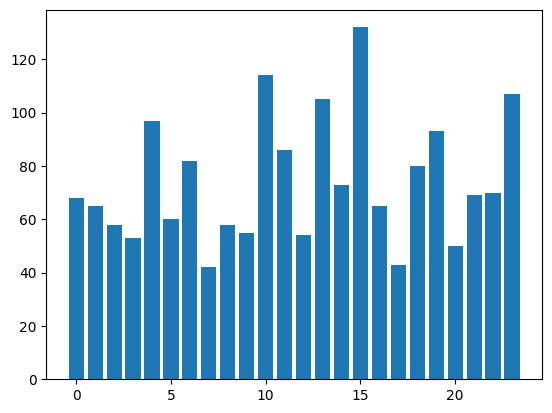

In [37]:
from collections import Counter

some_list = topic

sorted_list = sorted(some_list)
sorted_counted = Counter(sorted_list)

range_length = list(range(max(some_list))) # Get the largest value to get the range.
data_series = {}

for i in range_length:
    data_series[i] = 0 # Initialize series so that we have a template and we just have to fill in the values.

for key, value in sorted_counted.items():
    data_series[key] = value

data_series = pd.Series(data_series)
x_values = data_series.index

# you can customize the limits of the x-axis
# plt.xlim(0, max(some_list))
plt.bar(x_values, data_series.values)

plt.show() 

In [108]:
topic[0]

22

In [112]:
new_data = []

for x in range(len(topic)):
    new_data += [[moral[x]["story"],moral[x]["moral"],topic[x]]]

In [114]:
new_data[1]

['A wolf had been feasting too greedily, and a bone had stuck crosswise in his throat. He could get it neither up nor down, and of course he could not eat a thing. Naturally that was an awful state of affairs for a greedy wolf. So away he hurried to the crane. He was sure that she, with her long neck and bill, would easily be able to reach the bone and pull it out. "I will reward you very handsomely," Said the wolf, "If you pull that bone out for me."The crane, as you can imagine, was very uneasy about putting her head in a wolf\'s throat. But she was grasping in nature, so she did what the wolf asked her to do. When the wolf felt that the bone was gone, he started to walk away. "But what about my reward!" Called the crane anxiously. "What!" Snarled the wolf, whirling around. "Haven\'t you got it? isn\'t it enough that I let you take your head out of my mouth without snapping it off?" ',
 'Expect no reward for serving the wicked. ',
 3]

In [118]:
from operator import itemgetter
new_data_ = sorted(new_data, key=itemgetter(2))

In [119]:
with open('lda_result_1.txt', 'w') as f:
    for line in new_data_:
        f.write(f"{line}\n")